# MLP on House Prices with Keras

All Rights Reserved © <a href="http://www.louisdorard.com">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/DL_icon.png">

## Define `X_train` and `y_train`

In [1]:
%run HousePrices_1D.ipynb

Using TensorFlow backend.


List of numerical features that don't have missing values:

In [2]:
features = [
#    'MSSubClass',
#    'LotFrontage',
    'LotArea',
#    'OverallQual',
#    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    '1stFlrSF',
    '2ndFlrSF',
#    'LowQualFinSF',
#    'GrLivArea',
    'FullBath',
    'HalfBath',
#    'BedroomAbvGr',
#    'KitchenAbvGr',
#    'TotRmsAbvGrd',
#    'Fireplaces',
#    'WoodDeckSF',
#    'OpenPorchSF',
#    'EnclosedPorch',
#    '3SsnPorch',
#    'ScreenPorch',
    'PoolArea',
#    'MiscVal',
#    'MoSold',
    'YrSold']

In [3]:
X_train_full = data[features].values.astype(float)
y_train_full = data[['SalePrice']].values.astype(float)

Split into an actual training set and a validation set.

(Note: make split reproducible -> fix seed of numpy's random number generator, before using scikit)

In [4]:
from numpy import random as np_random
SEED = 42
np_random.seed(SEED)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Normalize inputs:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_X.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
X_train_scaled = scaler_X.transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

Log-transform outputs:

In [8]:
from numpy import log
y_train_log = log(y_train)
y_val_log = log(y_val)

Normalize outputs? Could be useful if training an MLP...

_"Reducing the scale of the target variable will, in turn, reduce the size of the gradient used to update the weights and result in a more stable model and training process."_ ([Source](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/))

In [9]:
scaler_Y_log = StandardScaler()
scaler_Y_log.fit(y_train_log)
y_train_log_scaled = scaler_Y_log.transform(y_train_log)
y_val_log_scaled = scaler_Y_log.transform(y_val_log)

## Model relationship between `x` and  `y`

Make results reproducible -> fix seed of TensorFlow's random number generator

In [10]:
from tensorflow import random as tf_random
tf_random.set_seed(SEED)

Define model:

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
n_input = X_train.shape[1]
model = Sequential([
    Input(shape=n_input),
    Dense(n_input,kernel_initializer='normal', activation='relu'),
    Dense(1)
])

Check model is defined as expected:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


## Set up optimizer

Using Adam instead of SGD

In [13]:
from tensorflow.keras.optimizers import Adam

LEARNING_RATE = 0.01
model.compile(loss='mse', optimizer=Adam(lr=LEARNING_RATE))

## Fit model

In [14]:
BATCH_SIZE = X_train.shape[0]
EPOCHS = 200
history = model.fit(X_train_scaled, \
                    y_train_log_scaled, \
                    validation_data=(X_val_scaled, y_val_log_scaled), \
                    epochs=EPOCHS, \
                    batch_size=BATCH_SIZE, \
                    verbose=2)

Train on 1095 samples, validate on 365 samples
Epoch 1/200
1095/1095 - 1s - loss: 1.0613 - val_loss: 1.0709
Epoch 2/200
1095/1095 - 0s - loss: 0.9361 - val_loss: 0.9492
Epoch 3/200
1095/1095 - 0s - loss: 0.8282 - val_loss: 0.8364
Epoch 4/200
1095/1095 - 0s - loss: 0.7261 - val_loss: 0.7318
Epoch 5/200
1095/1095 - 0s - loss: 0.6339 - val_loss: 0.6401
Epoch 6/200
1095/1095 - 0s - loss: 0.5551 - val_loss: 0.5614
Epoch 7/200
1095/1095 - 0s - loss: 0.4918 - val_loss: 0.4954
Epoch 8/200
1095/1095 - 0s - loss: 0.4425 - val_loss: 0.4414
Epoch 9/200
1095/1095 - 0s - loss: 0.4057 - val_loss: 0.3982
Epoch 10/200
1095/1095 - 0s - loss: 0.3789 - val_loss: 0.3638
Epoch 11/200
1095/1095 - 0s - loss: 0.3592 - val_loss: 0.3360
Epoch 12/200
1095/1095 - 0s - loss: 0.3436 - val_loss: 0.3132
Epoch 13/200
1095/1095 - 0s - loss: 0.3305 - val_loss: 0.2951
Epoch 14/200
1095/1095 - 0s - loss: 0.3193 - val_loss: 0.2819
Epoch 15/200
1095/1095 - 0s - loss: 0.3108 - val_loss: 0.2739
Epoch 16/200
1095/1095 - 0s - lo

Epoch 133/200
1095/1095 - 0s - loss: 0.1916 - val_loss: 0.2200
Epoch 134/200
1095/1095 - 0s - loss: 0.1912 - val_loss: 0.2198
Epoch 135/200
1095/1095 - 0s - loss: 0.1909 - val_loss: 0.2198
Epoch 136/200
1095/1095 - 0s - loss: 0.1905 - val_loss: 0.2197
Epoch 137/200
1095/1095 - 0s - loss: 0.1903 - val_loss: 0.2196
Epoch 138/200
1095/1095 - 0s - loss: 0.1901 - val_loss: 0.2194
Epoch 139/200
1095/1095 - 0s - loss: 0.1900 - val_loss: 0.2192
Epoch 140/200
1095/1095 - 0s - loss: 0.1898 - val_loss: 0.2190
Epoch 141/200
1095/1095 - 0s - loss: 0.1897 - val_loss: 0.2187
Epoch 142/200
1095/1095 - 0s - loss: 0.1895 - val_loss: 0.2185
Epoch 143/200
1095/1095 - 0s - loss: 0.1894 - val_loss: 0.2183
Epoch 144/200
1095/1095 - 0s - loss: 0.1892 - val_loss: 0.2181
Epoch 145/200
1095/1095 - 0s - loss: 0.1891 - val_loss: 0.2179
Epoch 146/200
1095/1095 - 0s - loss: 0.1889 - val_loss: 0.2177
Epoch 147/200
1095/1095 - 0s - loss: 0.1888 - val_loss: 0.2174
Epoch 148/200
1095/1095 - 0s - loss: 0.1887 - val_loss:

## Review learning curve

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('dark_background')

<IPython.core.display.Javascript object>


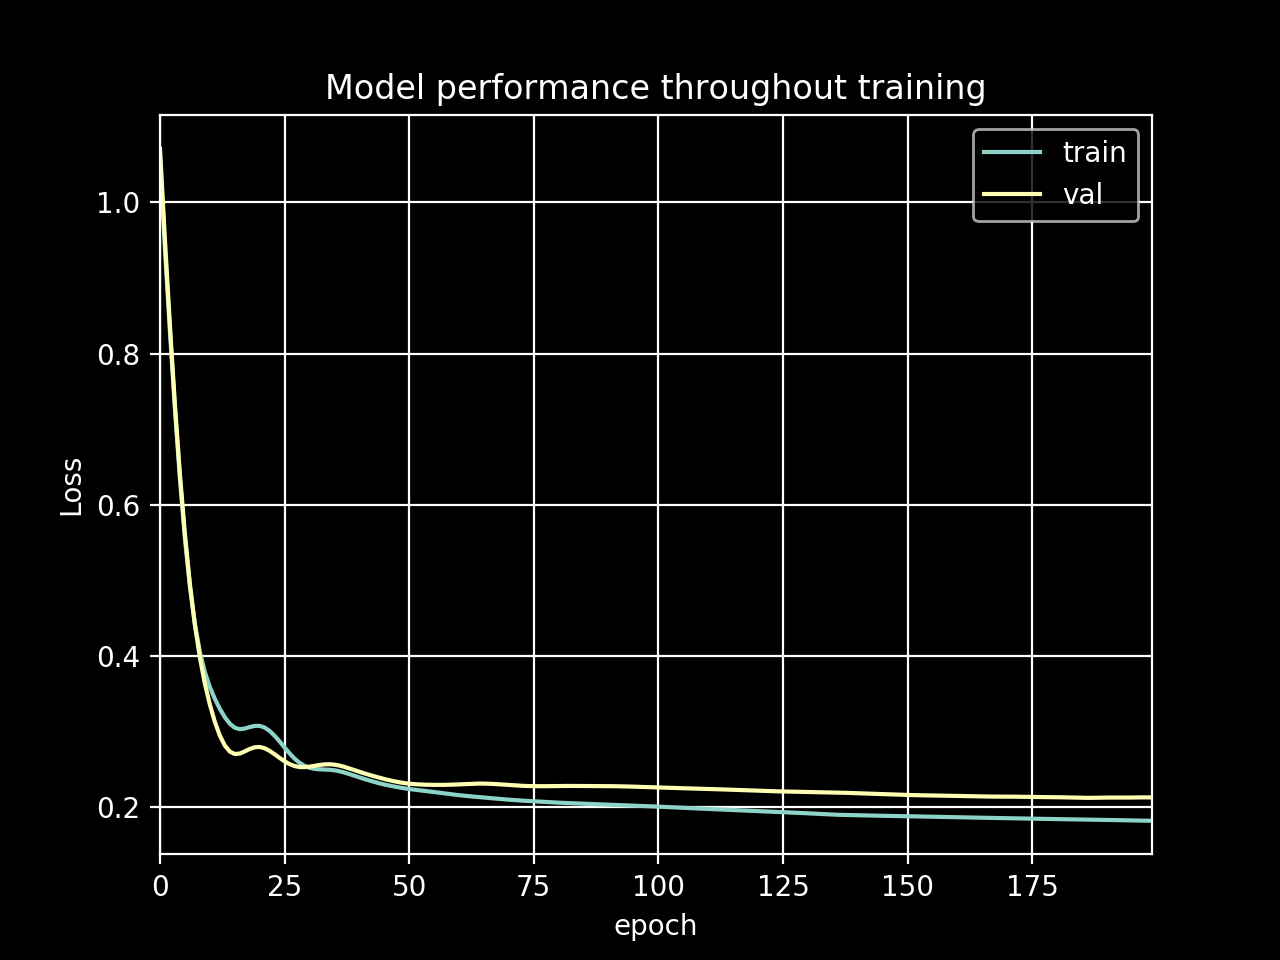

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Evaluate model

Predict on val set:

In [17]:
pred = model.predict(X_val_scaled)

Wait... what are we predicting again?

In [18]:
y_pred_log_scaled = pred

De-normalize predictions:

In [19]:
y_pred_log = scaler_Y_log.inverse_transform(y_pred_log_scaled)

Go back from log-dollars to dollars:

In [20]:
from numpy import exp
y_pred = exp(y_pred_log)

Compute performance metrics:

In [21]:
from sklearn import metrics
print(metrics.r2_score(y_val, y_pred))

0.8206844312717905


In [22]:
from sklearn import metrics
print(metrics.r2_score(y_val_log, y_pred_log))

0.8094962825487928


In [23]:
from math import sqrt
sqrt(metrics.mean_squared_error(y_val_log, y_pred_log))

0.181624643134601